In [2]:
print(df_location_0)

     Total Time Signature Verification Time     HMAC Comparison Time  \
0      0.053508     [0.0018301010131835938]  [0.0004031658172607422]   
1      0.051546     [0.0016863346099853516]  [0.0003724098205566406]   
2      0.046375      [0.002153635025024414]  [0.0003955364227294922]   
3      0.050179     [0.0017712116241455078]  [0.0004429817199707031]   
4      0.052269     [0.0018634796142578125]  [0.0003807544708251953]   
..          ...                         ...                      ...   
995    0.057970     [0.0014102458953857422]    0.0003643035888671875   
996    0.053799      [0.001458883285522461]    0.0003428459167480469   
997    0.057948     [0.0015730857849121094]     0.000362396240234375   
998    0.051338      [0.001359701156616211]    0.0003936290740966797   
999    0.059593     [0.0013926029205322266]   0.00033164024353027344   

                Signing Time   AES-GCM Encryption Time  
0    [0.0011432170867919922]  [0.00011610984802246094]  
1    [0.0011835098266

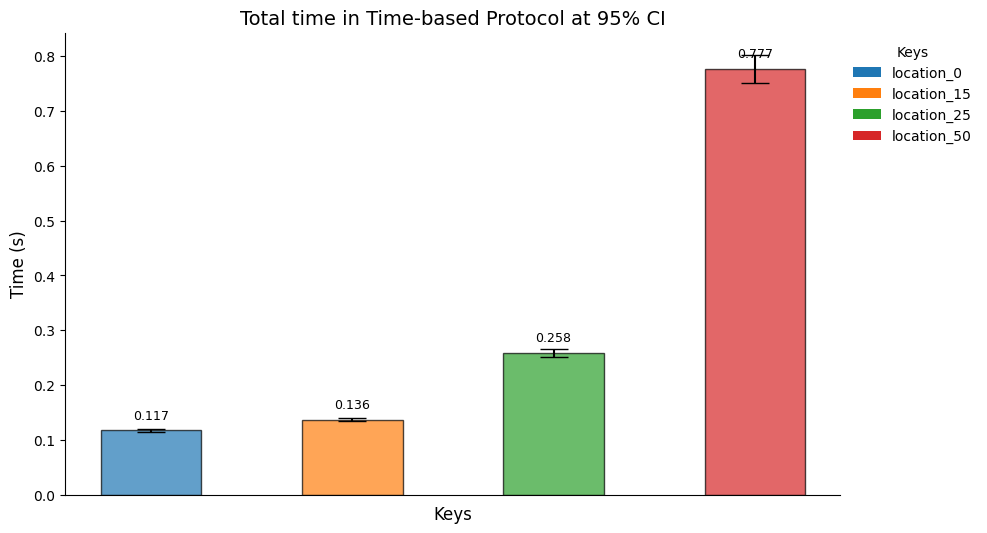

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

df_location_0 = pd.read_csv('./data/location/receiver_location_based_protocol_distance_0.csv')
df_location_15 = pd.read_csv('./data/location/receiver_location_based_protocol_distance_15.csv')
df_location_25 = pd.read_csv('./data/location/receiver_location_based_protocol_distance_25.csv')
df_location_50 = pd.read_csv('./data/location/receiver_location_based_protocol_distance_50.csv')


# Choose a column to compare
column_to_compare = 'Total Time'
scientific_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
# Extract data for the chosen column from the concatenated DataFrames
data_columns_concatenated = {
    'location_0': df_location_0[column_to_compare],
    'location_15': df_location_15[column_to_compare],
    'location_25': df_location_25[column_to_compare],
    'location_50': df_location_50[column_to_compare],

    
    }

# Calculate mean and standard deviation
means = [data_column.mean() for data_column in data_columns_concatenated.values()]
std_devs = [data_column.std() for data_column in data_columns_concatenated.values()]
n_values = [len(data_column) for data_column in data_columns_concatenated.values()]

# Calculate 95% confidence interval
ci = [1.96 * std_dev / np.sqrt(n) for std_dev, n in zip(std_devs, n_values)]

# Prepare data for plotting
keys = list(data_columns_concatenated.keys())
x_pos = np.arange(len(keys))

# Plot bar graph with mean and standard deviation
plt.figure(figsize=(10, 6))
bars = plt.bar(x_pos, means, yerr=ci, align='center', alpha=0.7, ecolor='black', capsize=10, width=0.5, color=scientific_colors, edgecolor='black')

# Customize legend
legend_elements = [Patch(facecolor=color, label=key) for key, color in zip(keys, scientific_colors)]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), title='Keys', frameon=False)

# Remove x-axis labels
plt.xticks([])

# Add data labels on top of the bars
for i, mean in enumerate(means):
    plt.text(x_pos[i], mean + 0.02 * max(means), f'{mean:.3f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Keys', fontsize=12)
plt.ylabel('Time (s)', fontsize=12)
plt.title(f'Total time in Time-based Protocol at 95% CI', fontsize=14)

# Remove the top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [13]:
print(means)
print(ci)

[0.11722212528617994, 0.13643656277656555, 0.2579575870037079, 0.7769631962776185]
[0.0027303595896619043, 0.0024253851529663605, 0.00701945177410792, 0.026052842454260976]


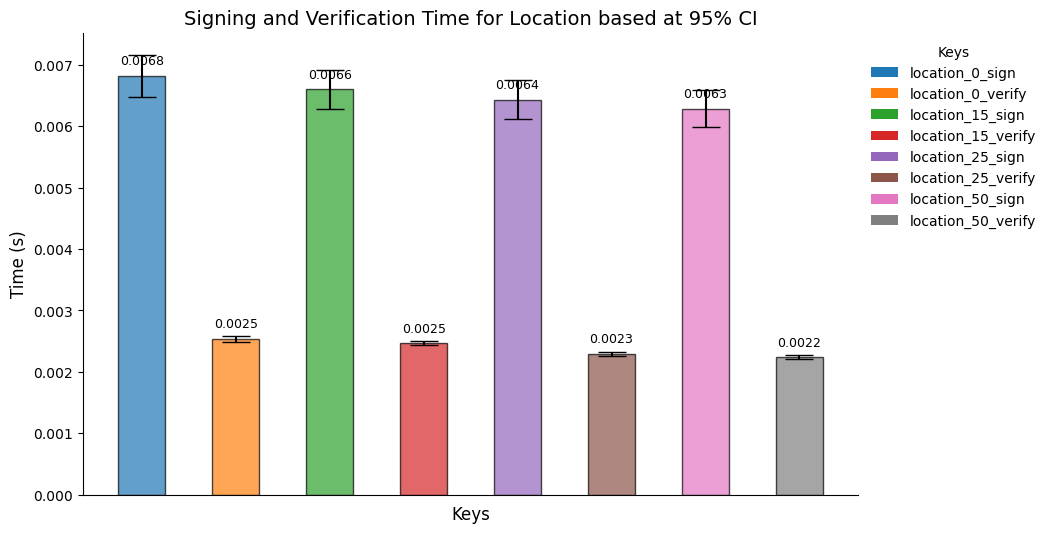

In [14]:
# Choose a column to compare

# Extract data for the chosen column from the concatenated DataFrames
data_columns_concatenated = {
    'location_0_sign': df_location_0['Signing Time'].apply(lambda x: eval(x)[0]),
    'location_0_verify': df_location_0['Signature Verification Time'].apply(lambda x: eval(x)[0]),
    'location_15_sign': df_location_15['Signing Time'].apply(lambda x: eval(x)[0]),
    'location_15_verify': df_location_15['Signature Verification Time'].apply(lambda x: eval(x)[0]),
     'location_25_sign': df_location_25['Signing Time'].apply(lambda x: eval(x)[0]),
    'location_25_verify': df_location_25['Signature Verification Time'].apply(lambda x: eval(x)[0]),
     'location_50_sign': df_location_50['Signing Time'].apply(lambda x: eval(x)[0]),
    'location_50_verify': df_location_50['Signature Verification Time'].apply(lambda x: eval(x)[0]),
    
     }


# Calculate mean and standard deviation
means = [data_column.mean() for data_column in data_columns_concatenated.values()]
std_devs = [data_column.std() for data_column in data_columns_concatenated.values()]

n_values = [len(data_column) for data_column in data_columns_concatenated.values()]

# Calculate 95% confidence interval
ci = [1.96 * std_dev / np.sqrt(n) for std_dev, n in zip(std_devs, n_values)]

# Prepare data for plotting
keys = list(data_columns_concatenated.keys())
x_pos = np.arange(len(keys))

# Plot bar graph with mean and standard deviation
plt.figure(figsize=(10, 6))
bars = plt.bar(x_pos, means, yerr=ci, align='center', alpha=0.7, ecolor='black', capsize=10, width=0.5, color=scientific_colors, edgecolor='black')

# Customize legend
legend_elements = [Patch(facecolor=color, label=key) for key, color in zip(keys, scientific_colors)]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), title='Keys', frameon=False)

# Remove x-axis labels
plt.xticks([])

# Add data labels on top of the bars
for i, mean in enumerate(means):
    plt.text(x_pos[i], mean + 0.02 * max(means), f'{mean:.4f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Keys', fontsize=12)
plt.ylabel('Time (s)', fontsize=12)
plt.title(f'Signing and Verification Time for Location based at 95% CI', fontsize=14)

# Remove the top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [15]:
print(means)
print(ci)

[0.006822266340255737, 0.002534996271133423, 0.006600338935852051, 0.002465487003326416, 0.0064318904876708985, 0.002290135622024536, 0.006280163288116455, 0.002235590219497681]
[0.0003431264174062662, 4.573172257650856e-05, 0.0003208890074537406, 3.6488564786921726e-05, 0.0003136036067404623, 2.9059012252310827e-05, 0.0003021933053031728, 3.134665709538781e-05]
